In [62]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
flag = cv2.imread('./ranbir_cv.jpg')

In [64]:
flag.shape

(435, 543, 3)

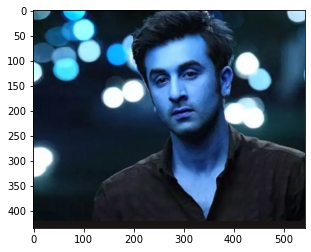

In [65]:
plt.imshow(flag)

In [66]:
gray = cv2.cvtColor(flag,cv.COLOR_BGR2GRAY)
gray.shape

(435, 543)

In [67]:
gray

array([[ 22, 129, 132, ..., 237, 235, 233],
       [ 21, 129, 131, ..., 237, 235, 233],
       [ 21, 128, 130, ..., 237, 235, 234],
       ...,
       [ 21,  21,  21, ...,  21,  21,  21],
       [ 21,  21,  21, ...,  21,  21,  21],
       [ 21,  21,  21, ...,  21,  21,  21]], dtype=uint8)

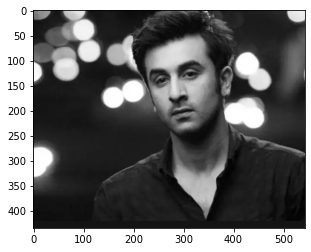

In [68]:
plt.imshow(gray,cmap='gray')

In [69]:
gray.shape

(435, 543)

In [70]:
gray

array([[ 22, 129, 132, ..., 237, 235, 233],
       [ 21, 129, 131, ..., 237, 235, 233],
       [ 21, 128, 130, ..., 237, 235, 234],
       ...,
       [ 21,  21,  21, ...,  21,  21,  21],
       [ 21,  21,  21, ...,  21,  21,  21],
       [ 21,  21,  21, ...,  21,  21,  21]], dtype=uint8)

In [71]:
face_cascade = cv.CascadeClassifier('./harcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./harcascade/haarcascade_eye.xml')
face = face_cascade.detectMultiScale(gray)
face

array([[196,  60, 183, 183]], dtype=int32)

In [73]:
(x,y,w,h) = face[0]
x,y,w,h

(196, 60, 183, 183)

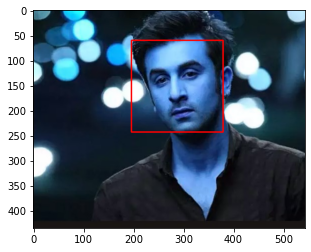

In [74]:
face_cut = cv2.rectangle(flag,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_cut)

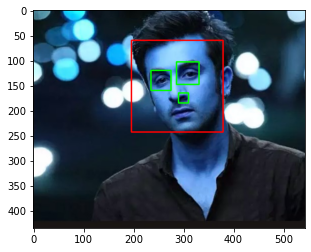

In [76]:
cv2.destroyAllWindows()
for (x,y,w,h) in face:
    face_cut = cv2.rectangle(flag,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_cut[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_cut,cmap='gray')
plt.show()

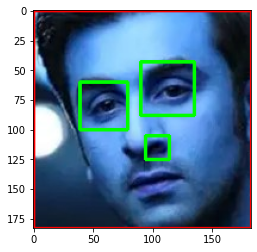

In [77]:
plt.imshow(roi_color,cmap='gray')